# **Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/content/train_ctrUa4K.csv")
test = pd.read_csv("/content/test_lAUu6dG.csv")

In [3]:
train.shape

(614, 13)

In [4]:
test.shape

(367, 12)

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **Exploratory Data Analysis**

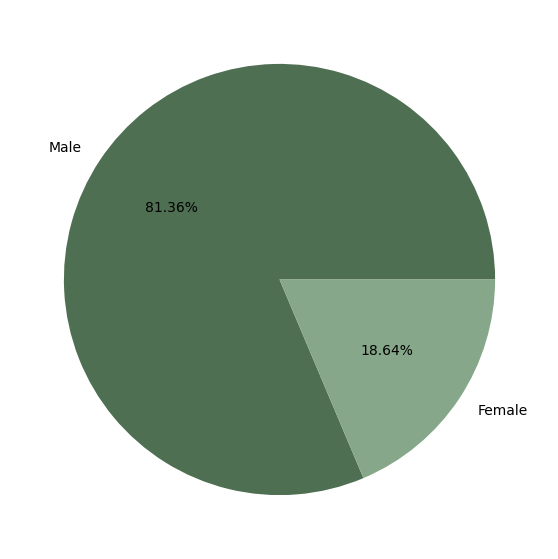

In [10]:
size = train['Gender'].value_counts()
labels = ['Male', 'Female']
color = ['#4F6F52', '#86A789']

plt.figure(figsize = (7,7))
plt.pie(size, labels=labels, colors=color, autopct='%.2f%%')
plt.show()

In [11]:
train['Loan_ID'] = train['Loan_ID'].str.replace('LP00', '')
test['Loan_ID'] = test['Loan_ID'].str.replace('LP00', '')

In [12]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<ipython-input-13-4a3da6f1795d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='viridis', annot=True, fmt='.2f')


<Axes: >

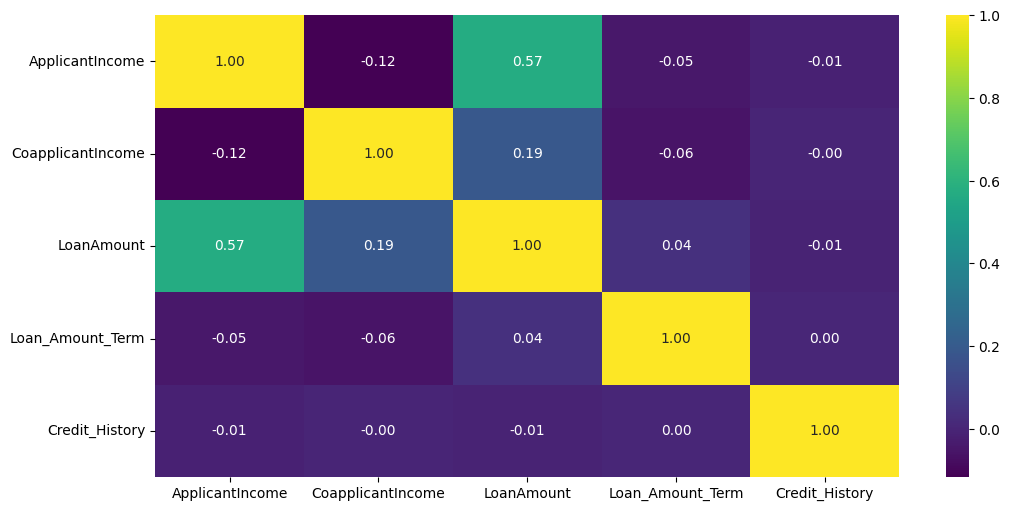

In [13]:
plt.figure(figsize = (12,6))
sns.heatmap(train.corr(), cmap='viridis', annot=True, fmt='.2f')

In [14]:
gender = train[['Gender', 'LoanAmount']].groupby("Gender").mean()
gender = pd.DataFrame(gender)
gender

,LoanAmount
Gender,
Female,126.697248
Male,149.265957


In [15]:
Education = train[['Education', 'LoanAmount']].groupby("Education").mean()
Education = pd.DataFrame(Education)
Education

,LoanAmount
Education,
Graduate,154.060215
Not Graduate,118.409449


# **Dealing with the missing data**

In [16]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
train['Gender'] = train['Gender'].fillna('Male')
train['Married'] = train['Married'].fillna('Yes')
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna('No')
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [18]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [20]:
test['Gender'] = test['Gender'].fillna('Male')
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna('No')
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [21]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# **Changing the datatypes of certain columns**

In [22]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int64')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('int64')

In [23]:
train['Dependents'] = train['Dependents'].str.rstrip('+')
test['Dependents'] = test['Dependents'].str.rstrip('+')

In [24]:
train['Dependents'] = train['Dependents'].astype('int64')
test['Dependents'] = test['Dependents'].astype('int64')

In [25]:
#labellig Categorical columns

In [26]:
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['Married'] = train['Married'].map({'No' : 0, 'Yes': 1})
train['Education'] = train['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
train['Self_Employed'] = train['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [27]:
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['Married'] = test['Married'].map({'No' : 0, 'Yes': 1})
test['Education'] = test['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
test['Self_Employed'] = test['Self_Employed'].map({'No' : 0, 'Yes' : 1})

**Creating dummy variables for Property column**

In [28]:
property_area = pd.get_dummies(train['Property_Area'], prefix='Property_Area')
train = pd.concat([train, property_area], axis = 1)
train = train.drop('Property_Area', axis = 1)


property_area = pd.get_dummies(test['Property_Area'], prefix='Property_Area')
test = pd.concat([test, property_area], axis = 1)
test = test.drop('Property_Area', axis = 1)

# **Scaling the data**

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()

train['Loan_ID'] = scaler.fit_transform(train['Loan_ID'].values.reshape(-1, 1))
test['Loan_ID'] = scaler.transform(test['Loan_ID'].values.reshape(-1, 1))

In [30]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [31]:
for col in numerical_cols:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

# **Splitting the data**

In [32]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']
X_test = test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# **Building Models**

In [35]:
#Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [36]:
#initialising the classifiers
DTC = DecisionTreeClassifier(random_state=42)
GNB = GaussianNB()
lr = LogisticRegression()
RFC=RandomForestClassifier(n_estimators=100)
KNN = KNeighborsClassifier(n_neighbors=15)
SVM = SVC(random_state=42)

In [37]:
#Applying Logistical Regression
lr.fit(X_train, y_train)
y_pred=lr.predict(X_val)
print("Measuring Efficiency ")
print("Confusion Matrix is :\n",confusion_matrix(y_val,y_pred))
print('Accuracy is',accuracy_score(y_val,y_pred))
print('Precision is',precision_score(y_val,y_pred,average='macro'))
print('Recall is',recall_score(y_val,y_pred,average='macro'))
print('F1 score is',f1_score(y_val,y_pred,average='macro'),"\n")


Measuring Efficiency 
Confusion Matrix is :
 [[ 27  38]
 [  2 118]]
Accuracy is 0.7837837837837838
Precision is 0.8437223695844385
Recall is 0.6993589743589743
F1 score is 0.7147702744372495 



In [38]:
#Applying Decision Tree Classifier
DTC.fit(X_train, y_train)
y_pred=DTC.predict(X_val)
print("Measuring Efficiency")
print("Confusion Matrix is :\n",confusion_matrix(y_val,y_pred))
print('Accuracy is',accuracy_score(y_val,y_pred))
print('Precision is',precision_score(y_val,y_pred,average='macro'))
print('Recall is',recall_score(y_val,y_pred,average='macro'))
print('F1 score is',f1_score(y_val,y_pred,average='macro'),"\n")

Measuring Efficiency
Confusion Matrix is :
 [[ 32  33]
 [ 20 100]]
Accuracy is 0.7135135135135136
Precision is 0.6836321573163678
Recall is 0.6628205128205129
F1 score is 0.668761190500321 



In [39]:
#Applying Support Vector Machine Classifier
SVM.fit(X_train, y_train)
y_pred=SVM.predict(X_val)
print("Measuring Efficiency")
print("Confusion Matrix is :\n",confusion_matrix(y_val,y_pred))
print('Accuracy is',accuracy_score(y_val,y_pred))
print('Precision is',precision_score(y_val,y_pred,average='macro'))
print('Recall is',recall_score(y_val,y_pred,average='macro'))
print('F1 score is',f1_score(y_val,y_pred,average='macro'),"\n")

Measuring Efficiency
Confusion Matrix is :
 [[ 26  39]
 [  1 119]]
Accuracy is 0.7837837837837838
Precision is 0.8580637599624941
Recall is 0.6958333333333333
F1 score is 0.7106662496090085 



In [40]:
#Applying Random Forest Classifier Algorithm
RFC.fit(X_train, y_train)
y_pred=RFC.predict(X_val)
print("Measuring Efficiency")
print("Confusion Matrix is :\n",confusion_matrix(y_val,y_pred))
print('Accuracy is',accuracy_score(y_val,y_pred))
print('Precision is',precision_score(y_val,y_pred,average='macro'))
print('Recall is',recall_score(y_val,y_pred,average='macro'))
print('F1 score is',f1_score(y_val,y_pred,average='macro'),"\n")

Measuring Efficiency
Confusion Matrix is :
 [[ 32  33]
 [  4 116]]
Accuracy is 0.8
Precision is 0.8337061894108874
Recall is 0.7294871794871796
F1 score is 0.7480584489675733 



In [41]:
#Applying K Nearest Neighbor Classifier
KNN.fit(X_train, y_train)
y_pred=KNN.predict(X_val)
print("Measuring Efficiency")
print("Confusion Matrix is :\n",confusion_matrix(y_val,y_pred))
print('Accuracy is',accuracy_score(y_val,y_pred))
print('Precision is',precision_score(y_val,y_pred,average='macro'))
print('Recall is',recall_score(y_val,y_pred,average='macro'))
print('F1 score is',f1_score(y_val,y_pred,average='macro'),"\n")

Measuring Efficiency
Confusion Matrix is :
 [[  2  63]
 [  0 120]]
Accuracy is 0.6594594594594595
Precision is 0.8278688524590163
Recall is 0.5153846153846153
F1 score is 0.4258903502290528 



# **Hyperparameter Tuning**

In [42]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    }
}

In [43]:
from sklearn.model_selection import RandomizedSearchCV

scores = []

for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 10,
                            verbose=3, n_jobs=-1)
    rs.fit(X_train, y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

In [44]:
final = pd.DataFrame(scores, columns=['model', 'score', 'estimator'])
final.sort_values('score', ascending=False)

,model,score,estimator
0,LogisticRegression,0.820487,"LogisticRegression(C=0.3, max_iter=2100, penal..."


In [45]:
final['estimator'].iloc[0]

LogisticRegression(C=0.3, max_iter=2100, penalty='l1', solver='liblinear')

In [46]:
classifier = LogisticRegression(max_iter=300, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_val)

In [47]:
pred = classifier.predict(X_test)

# **Final Submission**

In [48]:
test_df = pd.read_csv('/content/test_lAUu6dG.csv')
submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')

submission['Loan_ID'] = test_df['Loan_ID']

In [49]:
submission['Loan_Status'] = pred

In [50]:
submission.to_csv('sample_submission.csv', index=False)